In [3]:
from Bio.SeqIO import parse
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

### Read a local FASTA file

In [20]:
file = open("cox1.fasta")

records = parse(file, "fasta") 
for record in records:    
    print("Id: %s" % record.id) 
    print("Name: %s" % record.name) 
    print("Description: %s" % record.description) 
    print("Annotations: %s" % record.annotations) 
    print("Sequence Data: %s" % record.seq) 

Id: COX1_human
Name: COX1_human
Description: COX1_human
Annotations: {}
Sequence Data: MFADRWLFSTNHKDIGtLyLLFGAWAGVLGtALsLLIRAELGQPGNLLGNDHIYNVIVTAHAFVMIFFMVMPIMIGGFGNWLVPLMIGAPDMAFPRMNNMSFWLLPPSLLLLLASAMVEAGAGTGWTVYPPLAGNYSHPGASVDLTIFSLHLAGVSSILGAINFITTIINMKPPAMTQYQTPLFVWSVLITAVLLLLSLPVLAAGITMLLTDRNLNTTFFDPAGGGDPILYQHLFWFFGHPEVYILILPGFGMISHIVTYYSGKKEPFGYMGMVWAMMSIGFLGFIVWAHHMFTVGMDVDTRAYFTSATMIIAIPtGVKVFSWLATLHGsNMKWSAAVLWALGFIFLFTVGGLTGIVLANSSLDIVLHDTYYVVAHFHYVLSMGAVFAIMGGFIHWFPLFSGYTLDQTYAKIHFTIMFIGVNLTFFPQHFLGLSGMPRRYSDYPDAYTTWNILSSVGSFISLTAVMLMIFMIWEAFASKRKVLMVEEPSMNLEWLYGCPPPYHTFEEPVYMKS-
Id: COX1_mouse
Name: COX1_mouse
Description: COX1_mouse
Annotations: {}
Sequence Data: MFINRWLFSTNHKDIGTLYLLFGAWAGMVGTALSILIRAELGQPGALLGDDQIYNVIVTAHAFVMIFFMVMPMMIGGFGNWLVPLMIGAPDMAFPRMNNMSFWLLPPSFLLLLASSMVEAGAGTGWTVYPPLAGNLAHAGASVDLTIFSLHLAGVSSILGAINFITTIINMKPPAMTQYQTPLFVWSVLITAVLLLLSLPVLAAGITMLLTDRNLNTTFFDPAGGGDPILYQHLFWFFGHPEVYILILPGFGIISHVVTYYSGKKEPFGYMGMVWAMMSIGFLGFIVWAHHMFTVGLDVDTRAYFTSATMI

### Retrieve a NBCI sequence

In [30]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "willjdew@gmail.com"
handle = Entrez.efetch(db="nucleotide", id="AB003468", rettype="fasta")
record = SeqIO.read(handle, "fasta")
record

SeqRecord(seq=Seq('GGTACCTTCTGAGGCGGAAAGAACCAGCCGGATCCCTCGAGGGATCCAGACATG...CGC'), id='AB003468.1', name='AB003468.1', description='AB003468.1 Cloning vector pAP3neo DNA, complete sequence', dbxrefs=[])

In [70]:
aa = record.translate()
aa

C:\ProgramData\Anaconda3\lib\site-packages\Bio\Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


SeqRecord(seq=Seq('GTF*GGKNQPDPSRDPDMIRYIDEFGQTTTRMQ*KKCFICEICDAIALFVTIIS...N*P'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

### Strip first sequence of AB003468 into just characters

In [32]:
CloningVector = str(record.seq)
CloningVector

'GGTACCTTCTGAGGCGGAAAGAACCAGCCGGATCCCTCGAGGGATCCAGACATGATAAGATACATTGATGAGTTTGGACAAACCACAACTAGAATGCAGTGAAAAAAATGCTTTATTTGTGAAATTTGTGATGCTATTGCTTTATTTGTAACCATTATAAGCTGCAATAAACAAGTTAACAACAACAATTGCATTCATTTTATGTTTCAGGTTCAGGGGGAGGTGTGGGAGGTTTTTTAAAGCAAGTAAAACCTCTACAAATGTGGTATGGCTGATTATGATCCGGCTGCCTCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCTCCCGGAGACGGTCACAGCTTGTCTGTAAGCGGATGCCGGGAGCAGACAAGCCCGTCAGGGCGCGTCAGCGGGTGTTGGCGGGTGTCGGGGCGCAGCCATGACCCAGTCACGTAGCGATAGCGGAGTGTATACTGGCTTAACTATGCGGCATCAGAGCAGATTGTACTGAGAGTGCACCATATGCGGTGTGAAATACCGCACAGATGCGTAAGGAGAAAATACCGCATCAGGCGCTCTTCCGCTTCCTCGCTCACTGACTCGCTGCGCTCGGTCGTTCGGCTGCGGCGAGCGGTATCAGCTCACTCAAAGGCGGTAATACGGTTATCCACAGAATCAGGGGATAACGCAGGAAAGAACATGTGAGCAAAAGGCCAGCAAAAGGCCAGGAACCGTAAAAAGGCCGCGTTGCTGGCGTTTTTCCATAGGCTCCGCCCCCCTGACGAGCATCACAAAAATCGACGCTCAAGTCAGAGGTGGCGAAACCCGACAGGACTATAAAGATACCAGGCGTTTCCCCCTGGAAGCTCCCTCGTGCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGATACCTGTCCGCCTTTCTCCCTTCGGGAAGCGTGGCGCTTTCTCATAGCTCACGCTGTAGGTATCTCAGTTCGGTGTAGGTCGTTCGCTCCAAGCT

In [39]:
# Do a basic nucleotide count on CloningVector
print(record.seq.count("A"))
print(record.seq.count("G"))
print(record.seq.count("C"))
print(record.seq.count("T"))

1321
1405
1324
1300


In [36]:
# Compute the GC content of CloningVector
from Bio import SeqUtils

SeqUtils.GC(CloningVector)

51.00934579439252

<function matplotlib.pyplot.show(*args, **kw)>

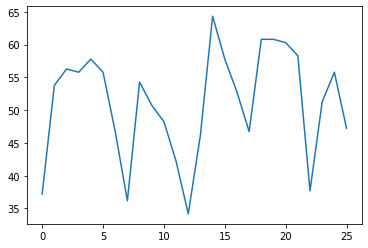

In [47]:
chunks = []
# Compute windows of size 200 for our sequence
for i in range(0, len(CloningVector)-199,200):
    chunk = CloningVector[i:i+199]
    chunks.append(round(SeqUtils.GC(chunk),2))

from matplotlib import pyplot as plt

plt.plot(chunks)
plt.show

In [50]:
def slidingwindowGCplot(windowsize, DNAinputseq):
    chunks = []
    for i in range(0, len(DNAinputseq)-windowsize-1, windowsize):
        chunk = DNAinputseq[i:i+windowsize-1]
        chunks.append(round(SeqUtils.GC(chunk),2))
    plt.plot(chunks)
    plt.show

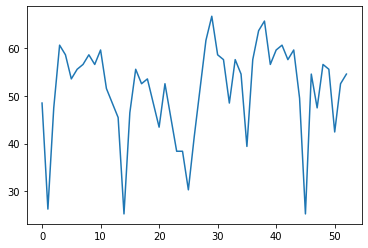

In [51]:
slidingwindowGCplot(100,CloningVector)

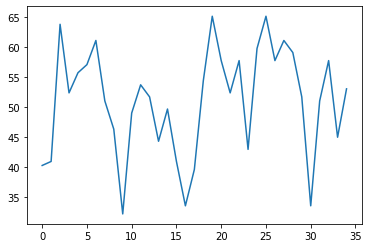

In [52]:
slidingwindowGCplot(150,CloningVector)

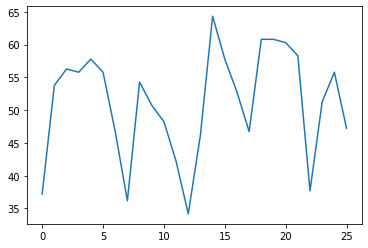

In [53]:
slidingwindowGCplot(200,CloningVector)

In [61]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def slidingwindowhydrophobicityplot(windowsize, protein):
    chunks = []
    for i in range(0, len(protein)-windowsize-1, windowsize):
        chunk = protein[i:i+windowsize-1]
        analyzed_protein = ProteinAnalysis(chunk)
        chunks.append(round((analyzed_protein.gravy()),2))
    plt.plot(chunks)
    plt.show

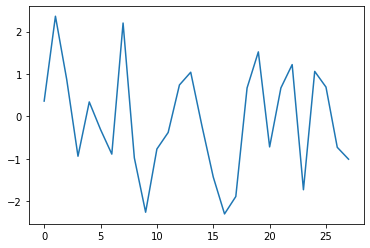

In [63]:
aa = "MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRIDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPVAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW"
slidingwindowhydrophobicityplot(10, aa)

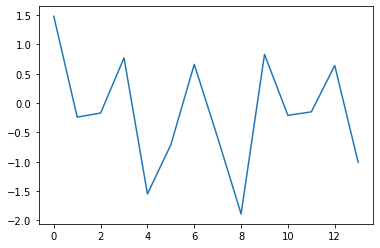

In [64]:
slidingwindowhydrophobicityplot(20, aa)

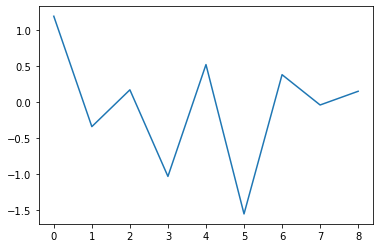

In [65]:
slidingwindowhydrophobicityplot(30, aa)